<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/EXAMPLE_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Exercise 2.4

Name: Juan Manuel G.G

Date: February 2021

### 1. Process description 

Consider a liquid flow system consisting of a sealed tank with noncondensible gas above the liquid as shown in Fig.1. Derive and unsteady state model relating the liquid level h to the input flow rate qi. Is the opperation of this system independent of the ambient pressure Pa? What about a system open to the atmosphere?

### 2. Assumptions 

* The gas obes the ideal gas law. A constant amount of $m_g/M$ model of gas is present in the tank

* The operation is isothermal 

* A square root relation holds for flow through the valve 

* Constant density 

### 3. Scheme of the process

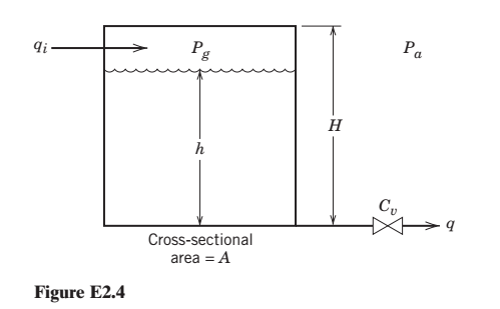

Figure 1. Scheme of the process 

### 4. Analysis 

#### Establish the model 

Mass balance 

$$
\frac{d(\rho V)}{dt} = q_i \rho - q \rho
$$

Since 

$$
q = C_v \sqrt{\Delta P}
$$

and 

$$
\Delta P = P_g + P_l - P_a
$$

where 

$$
P_g = N_g R T/(V_g) = m_g R T /(M_g V_g) = m_g R T /(M_g A(H-h(t)))
$$

also 

$$
P_l = \rho g h
$$

so we have 

$$
A\frac{dh}{dt} = q_i - C_v \sqrt{\frac{m_g R T}{M_g A (H - h(t))} + \rho g h(t) - P_a} \tag{1}
$$

#### Degrees of freedom analysis 

state variables: h (1)

equations: 1 DE (1)

degrees of freedom: 1 - 1 = 0

inputs: qi, Pa, mg

parameters: $\rho$, A, Cv, Mg, g

#### Steady state

Equating (1) to zero we get 

$$
q_i - C_v \sqrt{\frac{m_g R T}{M_g A (H - h(t))} + \rho g h(t) - P_a} = 0 \tag{2}
$$

Solving (2) for h may be challenging so let's use Python 

In [1]:
import sympy as sp 

In [3]:
qi, Cv, mg, R, T, Mg, A, H, h, rho, g, Pa = sp.symbols("qi, Cv, mg, R, T, Mg, A, H, h, rho, g, Pa")

In [4]:
eq = sp.Eq(qi - Cv*sp.sqrt(mg*R*T/(Mg*A*(H-h)) + rho*g*h - Pa), 0)

In [5]:
sp.solve(eq, h)

[(A*Mg*(Cv**2*(H*g*rho + Pa) + qi**2) - Cv**2*sqrt(A*Mg*(2*A*Cv**2*Mg*qi**2*(-H*g*rho + Pa) + A*Mg*qi**4 + Cv**4*(A*H**2*Mg*g**2*rho**2 - 2*A*H*Mg*Pa*g*rho + A*Mg*Pa**2 + 4*R*T*g*mg*rho))/Cv**4))/(2*A*Cv**2*Mg*g*rho),
 (A*Mg*(Cv**2*(H*g*rho + Pa) + qi**2) + Cv**2*sqrt(A*Mg*(2*A*Cv**2*Mg*qi**2*(-H*g*rho + Pa) + A*Mg*qi**4 + Cv**4*(A*H**2*Mg*g**2*rho**2 - 2*A*H*Mg*Pa*g*rho + A*Mg*Pa**2 + 4*R*T*g*mg*rho))/Cv**4))/(2*A*Cv**2*Mg*g*rho)]

Al menos sabemos que existe una solución :V

#### Simulate the model 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [43]:
def height(s,t,p,u):

    # state variable
    h = s[0]

    # inputs
    qi = u[0]

    # parameters
    Cv = p[0]
    mg = p[1]
    R = p[2]
    T = p[3]
    Mg = p[4]
    A = p[5]
    H = p[6]
    rho = p[7]
    g = p[8]
    Pa = p[9]

    dhdt = (1/A)*(qi - Cv*sp.sqrt(mg*R*T/(Mg*A*(H-h)) + rho*g*h - Pa))

    return dhdt

In [56]:
# establish parameters
p = [0.1, 0.1, 8.314, 220, 122, 20, 1.5, 1000, 9.81, 0]

In [60]:
# establish inputs 
u = [10]

# set inital conditions 
s = [0.8]

# set integration time 
time = np.linspace(0,10,100)

In [61]:
# solve ODEs
out = odeint(height, s, time, args=(p,u))

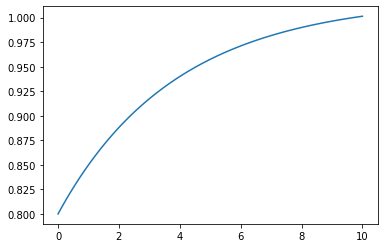

In [62]:
plt.plot(time, out)